In [61]:
import pandas as pd
info = pd.read_csv('/content/drive/MyDrive/predict_subcribe/data_info.csv')
sub = pd.read_csv('/content/drive/MyDrive/predict_subcribe/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/predict_subcribe/train.csv')
test = pd.read_csv('/content/drive/MyDrive/predict_subcribe/test.csv')

In [ ]:
info #average_time_per_learning_session , abandoned_learning_sessions

,column,description
0,user_id,사용자의 고유 식별자
1,subscription_duration,사용자가 서비스에 가입한 기간 (월)
2,recent_login_time,사용자가 마지막으로 로그인한 시간 (일)
3,average_login_time,사용자의 일반적인 로그인 시간
4,average_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)
5,monthly_active_learning_days,월간 활동적인 학습 일수
6,total_completed_courses,완료한 총 코스 수
7,recent_learning_achievement,최근 학습 성취도
8,abandoned_learning_sessions,중단된 학습 세션 수
9,community_engagement_level,커뮤니티 참여도


In [33]:
point = train[train['target']==0]['average_time_per_learning_session'].max()

In [44]:
train[train['average_time_per_learning_session']>point]

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
27,11c0c39b,6,17,11.796445,280.552367,17,15,80.826958,1,4,Low,Premium,0,3,1
43,08c55fa8,11,20,14.450352,210.626473,19,16,72.236784,1,3,Low,Basic,0,0,1
55,d75c5c11,9,27,19.392880,183.470916,24,12,42.870248,4,5,Medium,Premium,1,4,1
68,296f3a2c,12,24,15.411618,183.942930,6,12,67.100655,4,3,Low,Basic,5,1,1
119,f9761446,11,18,11.661776,180.267873,5,13,95.470555,3,5,Medium,Premium,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,065d8979,14,18,9.820772,197.018715,14,12,68.036611,1,3,Low,Basic,4,7,1
9947,adf051da,3,4,11.365475,230.429909,15,11,87.003077,3,3,Medium,Premium,1,6,1
9951,de2754f7,21,22,16.108321,262.126094,8,9,70.677943,5,5,Low,Basic,1,5,1
9952,99555077,13,5,8.318286,247.586361,19,14,70.807869,5,5,Medium,Basic,1,1,1


In [ ]:
# 1. abandoned_learning_sessions / total_completed_courses
# 2. monthly_active_learning_days * average_time_per_learning_session
# 3. average_time_per_learning_session - average_login_time

# 2. monthly_active_learning_days * average_time_per_learning_session


In [45]:
new['degree'] = new['monthly_active_learning_days'] * new['average_time_per_learning_session']
summary_stats1 = new.groupby('target')['degree'].agg(['mean', 'std', 'median'])
summary_stats1

,mean,std,median
target,,,
0,577.615870,640.829831,336.072548
1,756.188837,1007.297341,385.616800


In [46]:
import scipy.stats as stats

group_0 = new[new['target'] == 0]['degree']
group_1 = new[new['target'] == 1]['degree']

t_statistic, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
t_statistic, p_value

(-10.833153082173453, 3.395403311159175e-27)

# 3.average_time_per_learning_session - average_login_time

In [13]:
filtered_rows = train[train['average_login_time'] > train['average_time_per_learning_session']]
filtered_rows

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
14,aba89783,2,27,10.303337,2.712124,20,8,82.491912,4,5,Low,Basic,4,6,0
18,61bf854a,18,19,18.519018,8.389999,20,8,65.806160,3,5,Medium,Basic,1,0,1
19,c8d9c81f,6,16,14.571676,5.838557,23,21,73.921745,1,5,Low,Basic,4,0,1
25,fc660a6e,17,29,20.364167,14.931054,1,6,44.727997,1,3,High,Basic,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,f23bf8d4,12,3,14.318070,6.216495,21,16,75.221873,2,5,Low,Basic,0,6,1
9976,2602b60e,23,4,15.201025,0.058419,6,10,70.459241,4,5,Low,Premium,4,7,1
9983,f2757504,22,23,16.739713,6.047050,15,9,64.817228,4,5,Medium,Basic,2,3,0
9984,6831807d,10,20,14.032918,3.833025,24,13,76.616995,3,2,Medium,Basic,0,3,1


In [17]:
new = train.copy()
new['concentrate'] = new['average_time_per_learning_session'] - new['average_login_time']

In [20]:
summary_stats1 = new.groupby('target')['concentrate'].agg(['mean', 'std', 'median'])
summary_stats1

,mean,std,median
target,,,
0,31.430225,39.813907,20.010610
1,45.131498,63.552389,24.671244


In [24]:
import scipy.stats as stats

group_0 = new[new['target'] == 0]['concentrate']
group_1 = new[new['target'] == 1]['concentrate']

t_statistic, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
t_statistic, p_value

(-13.254344583996298, 9.213482353353787e-40)

In [9]:
train.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [62]:
train['degree'] = train['monthly_active_learning_days'] * train['average_time_per_learning_session']
train['concentrate'] = train['average_time_per_learning_session'] - train['average_login_time']

test['degree'] = test['monthly_active_learning_days'] * test['average_time_per_learning_session']
test['concentrate'] = test['average_time_per_learning_session'] - test['average_login_time']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [7]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [6]:
correlation = train.corr()
correlation

<ipython-input-6-7ef6f2d1873d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.005174,-0.003704,-0.006710
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.011653,0.008737,-0.004184
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.003129,0.009768,0.012508,-0.008527
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,0.086485,-0.001397,-0.002460,0.118261
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.016704,-0.003457,0.004876
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.014949,-0.013646,-0.004040
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,-0.000810,0.005612,-0.003968,0.002294
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.007322,0.010299,-0.019636
community_engagement_level,0.002114,-0.005486,0.003129,0.086485,0.000700,0.266026,-0.000810,0.015877,1.000000,0.005574,-0.015914,0.009641
customer_inquiry_history,-0.005174,0.011653,0.009768,-0.001397,-0.016704,-0.014949,0.005612,-0.007322,0.005574,1.000000,0.000128,0.000277


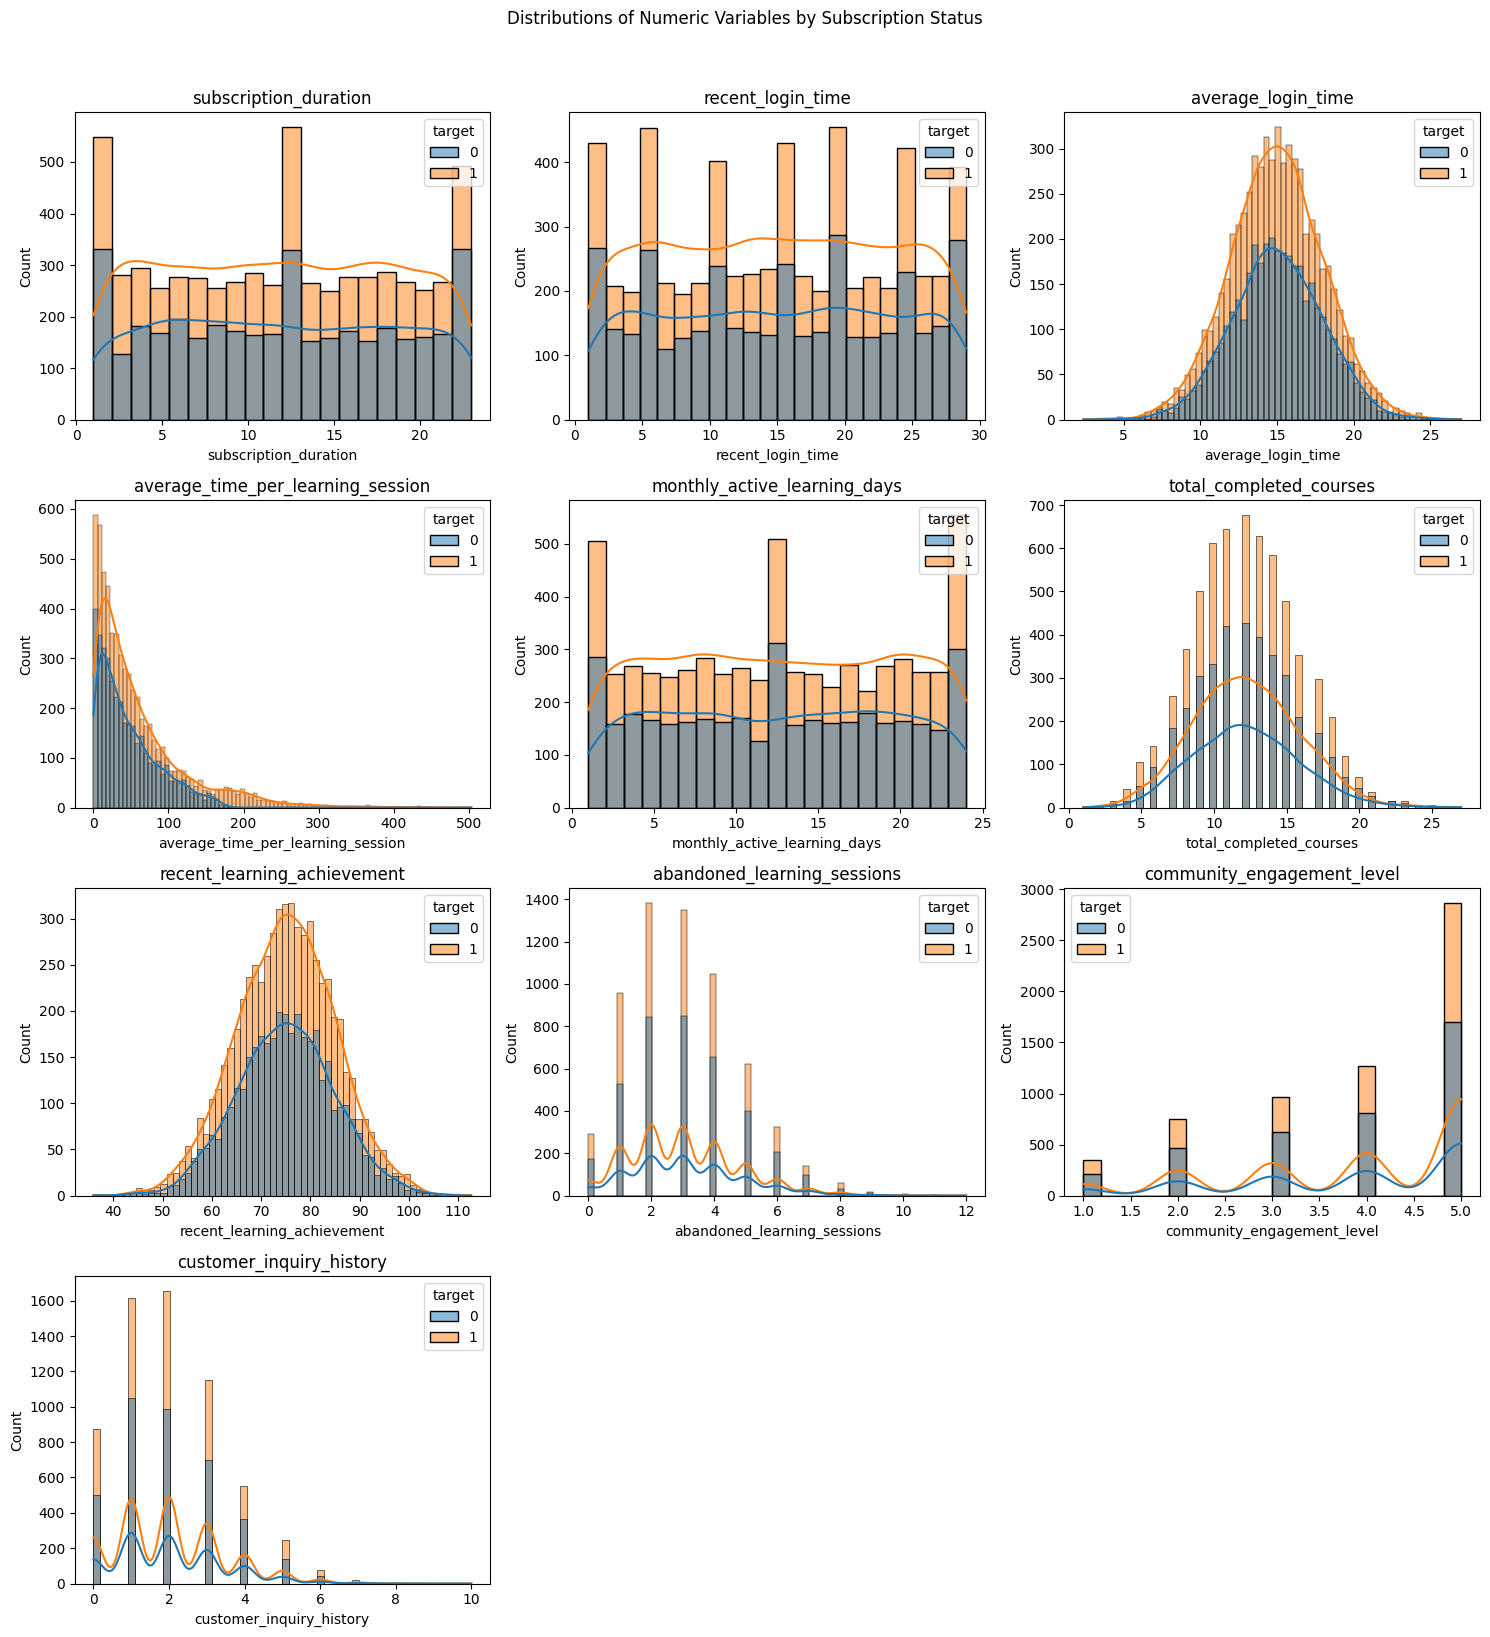

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4,3, figsize=(15, 16))
fig.suptitle('Distributions of Numeric Variables by Subscription Status', y=1.02)

numeric_columns = ['subscription_duration', 'recent_login_time', 'average_login_time',
                   'average_time_per_learning_session', 'monthly_active_learning_days',
                   'total_completed_courses', 'recent_learning_achievement',
                   'abandoned_learning_sessions', 'community_engagement_level',
                   'customer_inquiry_history']

for i, column in enumerate(numeric_columns):
    row_index = i // 3
    col_index = i % 3

    sns.histplot(data=train, x=column, hue=train['target'], kde=True, ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(f'{column}')

for i in range(len(numeric_columns), 12):
    row, col = i // 3, i % 3
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()

In [3]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [ ]:
train[train['target']==0]['average_time_per_learning_session'].describe()

count    3801.000000
mean       46.456986
std        39.639733
min         0.011515
25%        14.485582
50%        34.773346
75%        68.298309
max       179.176060
Name: average_time_per_learning_session, dtype: float64

In [2]:
train[train['target']==1]['average_time_per_learning_session'].describe()

count    6199.000000
mean       60.105533
std        63.477523
min         0.013535
25%        15.908562
50%        39.705116
75%        80.159683
max       503.372616
Name: average_time_per_learning_session, dtype: float64

In [ ]:
train['average_time_per_learning_session'].describe()

count    10000.000000
mean        54.917720
std         56.024310
min          0.011515
25%         15.276611
50%         37.578818
75%         75.584200
max        503.372616
Name: average_time_per_learning_session, dtype: float64

In [ ]:
import numpy as np
percentiles = np.arange(10, 101, 10)
percentile_values = np.percentile(train['average_time_per_learning_session'], percentiles)

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")

10th percentile: 5.674317187843202
20th percentile: 11.921680702052411
30th percentile: 19.19616378283299
40th percentile: 27.570532173297483
50th percentile: 37.57881776667051
60th percentile: 50.130927457524635
70th percentile: 65.48653835282146
80th percentile: 87.88868937829508
90th percentile: 126.30325539578445
100th percentile: 503.3726161819107


In [ ]:
train['average_time_per_learning_session'].quantile(0.95)

167.14456086980172

In [ ]:
train['harder'] = 0
train.loc[(train['average_time_per_learning_session'] > 168), 'harder'] = 1
test['harder'] = 0
test.loc[(test['average_time_per_learning_session'] > 168), 'harder'] = 1

train.sort_values(by='average_time_per_learning_session', ascending=False)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,harder
4657,9fd870d4,14,6,20.793307,503.372616,8,17,84.559844,0,5,Low,Premium,1,4,1,1
472,ed985d16,10,18,14.300585,490.233443,10,14,73.935099,3,5,High,Premium,3,7,1,1
9410,c022031e,5,21,18.302503,470.289498,20,18,80.618121,5,5,Medium,Premium,0,5,1,1
2593,1d6d0920,10,16,14.991031,447.095844,20,10,77.190644,4,5,Low,Premium,0,1,1,1
1764,b898afda,9,13,10.897867,444.324058,8,9,71.646432,3,1,High,Basic,3,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,c98ca4a7,18,24,16.903302,0.029555,11,16,70.061759,6,3,High,Premium,3,1,0,0
4281,eaf1d55c,4,14,11.664940,0.017473,9,10,83.682402,1,4,Low,Basic,2,5,0,0
7869,ef478fc0,17,27,10.379286,0.013535,1,13,67.519661,6,5,Low,Basic,1,3,1,0
6364,5c5d0c22,8,23,18.852496,0.012562,4,10,84.539730,7,4,Medium,Basic,1,0,0,0


In [ ]:
numeric_columns1 = ['subscription_duration', 'recent_login_time', 'average_login_time',
                   'average_time_per_learning_session', 'monthly_active_learning_days']
numeric_columns2 = ['total_completed_courses', 'recent_learning_achievement',
                   'abandoned_learning_sessions', 'community_engagement_level',
                   'customer_inquiry_history']

summary_stats1 = train.groupby('target')[numeric_columns1].agg(['mean', 'std', 'median'])
summary_stats2 = train.groupby('target')[numeric_columns2].agg(['mean', 'std', 'median'])
display(summary_stats1)
display(summary_stats2)

subscription_duration                  recent_login_time           \
                        mean       std median              mean      std   
target                                                                     
0                  11.953959  6.618295   12.0         15.057880  8.42873   
1                  11.862720  6.590500   12.0         14.985804  8.32231   

              average_login_time                       \
       median               mean       std     median   
target                                                  
0        15.0          15.026762  2.956732  14.979239   
1        15.0          14.974035  3.029275  14.979217   

       average_time_per_learning_session                        \
                                    mean        std     median   
target                                                           
0                              46.456986  39.639733  34.773346   
1                              60.105533  63.477523  39.705116   

       monthly_active_learning_days                   
                               mean       std median  
target                                                
0                         12.502236  6.854200   13.0  
1                         12.571866  6.980077   12.0

total_completed_courses                  recent_learning_achievement  \
                          mean       std median                        mean   
target                                                                        
0                    12.246251  3.630554   12.0                   75.000310   
1                    12.216003  3.636558   12.0                   75.047419   

                             abandoned_learning_sessions                   \
              std     median                        mean       std median   
target                                                                      
0        9.873574  74.981448                    3.087609  1.755430    3.0   
1       10.027058  75.199591                    3.016616  1.754416    3.0   

       community_engagement_level                  customer_inquiry_history  \
                             mean       std median                     mean   
target                                                                        
0                        3.870560  1.259105    4.0                 2.009997   
1                        3.895628  1.264061    4.0                 2.010808   

                         
             std median  
target                   
0       1.409145    2.0  
1       1.428306    2.0

In [ ]:
# H0: mean is same
from scipy.stats import ttest_ind

t_test_results = pd.DataFrame(index=numeric_columns, columns=['t_statistic', 'p_value'])

for column in numeric_columns:
    subscribed = train[train['target'] == 1][column]
    not_subscribed = train[train['target'] == 0][column]
    t_stat, p_value = ttest_ind(subscribed, not_subscribed)

    t_test_results.loc[column, 't_statistic'] = t_stat
    t_test_results.loc[column, 'p_value'] = p_value

t_test_results

,t_statistic,p_value
subscription_duration,-0.670932,0.502279
recent_login_time,-0.418349,0.675701
average_login_time,-0.852596,0.393904
average_time_per_learning_session,11.908479,0.0
monthly_active_learning_days,0.487548,0.625881
total_completed_courses,-0.404012,0.686213
recent_learning_achievement,0.229379,0.818579
abandoned_learning_sessions,-1.963799,0.049581
community_engagement_level,0.964067,0.335035
customer_inquiry_history,0.027697,0.977905


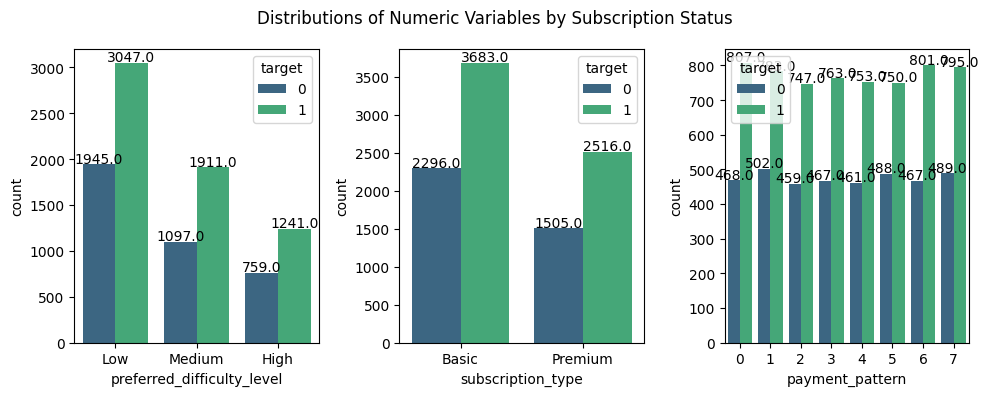

In [ ]:
import numpy as np

fig, ax = plt.subplots(1,3, figsize=(10, 4))
fig.suptitle('Distributions of Numeric Variables by Subscription Status')

category_columns = ['preferred_difficulty_level', 'subscription_type', 'payment_pattern']

for i, column in enumerate(category_columns):
    sns.countplot(data=train, x=column, hue='target', palette='viridis', ax=ax[i])

    for p in ax[i].patches:
        ax[i].annotate(f"{p.get_height():}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')


plt.tight_layout()
plt.show()

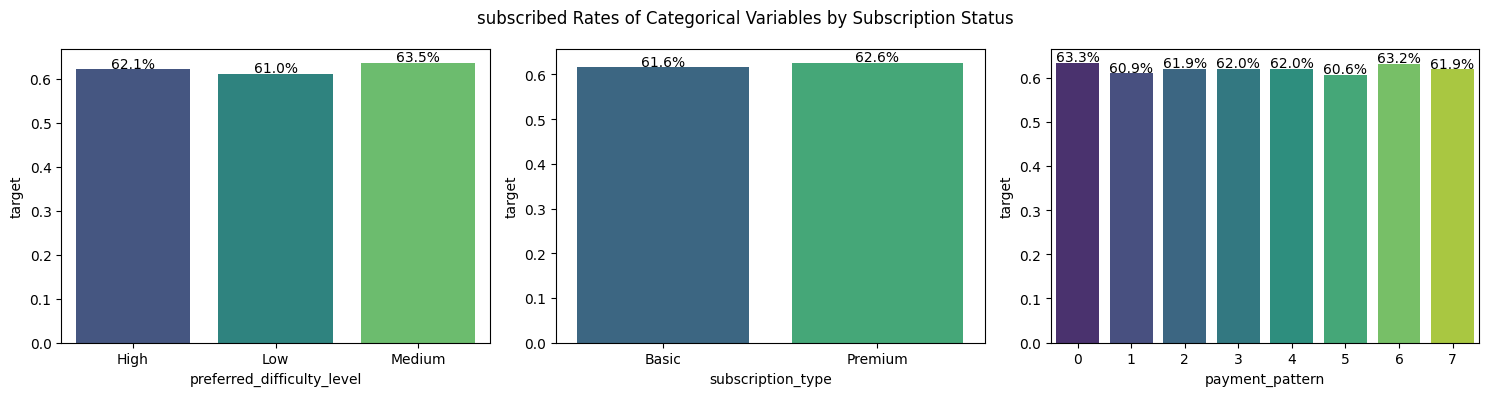

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('subscribed Rates of Categorical Variables by Subscription Status')

category_columns = ['preferred_difficulty_level', 'subscription_type', 'payment_pattern']

for i, column in enumerate(category_columns):
    subscribed_rates = train.groupby(column)['target'].mean().reset_index()

    sns.barplot(data=subscribed_rates, x=column, y='target', palette='viridis', ax=ax[i])

    for p in ax[i].patches:
        ax[i].annotate(f"{p.get_height():.1%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# The null hypothesis cannot be rejected
for column in category_columns:
    cont_table = pd.crosstab(train[column], train['target'])

    chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)

    print(column)
    print(f"Chi2 Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(expected)
    print('---------------------------------------------------------')

preferred_difficulty_level
Chi2 Statistic: 4.95445899120559
P-value: 0.08397555825766137
Degrees of Freedom: 2
Expected Frequencies Table:
[[ 760.2    1239.8   ]
 [1897.4592 3094.5408]
 [1143.3408 1864.6592]]
---------------------------------------------------------
subscription_type
Chi2 Statistic: 0.924292919153116
P-value: 0.3363503107808859
Degrees of Freedom: 1
Expected Frequencies Table:
[[2272.6179 3706.3821]
 [1528.3821 2492.6179]]
---------------------------------------------------------
payment_pattern
Chi2 Statistic: 3.3264772685914292
P-value: 0.8532485616136666
Degrees of Freedom: 7
Expected Frequencies Table:
[[484.6275 790.3725]
 [488.4285 796.5715]
 [458.4006 747.5994]
 [467.523  762.477 ]
 [461.4414 752.5586]
 [470.5638 767.4362]
 [481.9668 786.0332]
 [488.0484 795.9516]]
---------------------------------------------------------


#standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
label = ['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days',
         'total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','customer_inquiry_history']
scaler = StandardScaler()
train[label] = scaler.fit_transform(train[label])
test[label] = scaler.transform(test[label])


#Min_max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
label = ['subscription_duration','recent_login_time','average_login_time','average_time_per_learning_session','monthly_active_learning_days',
         'total_completed_courses','recent_learning_achievement','abandoned_learning_sessions','customer_inquiry_history']
scaler = MinMaxScaler()
train[label] = scaler.fit_transform(train[label])
test[label] = scaler.transform(test[label])

In [64]:
from sklearn.preprocessing import LabelEncoder
labels = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]
label_encoders = {}
for col in labels:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

In [ ]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,0.545455,0.464286,0.510710,0.016719,0.739130,0.576923,0.422657,0.250000,4,1,0,0.4,5,0
1,a0a60abb,0.681818,0.607143,0.653087,0.144299,0.652174,0.461538,0.803441,0.166667,3,2,0,0.1,6,1
2,b9f171ae,0.954545,0.000000,0.561419,0.043235,0.521739,0.500000,0.761609,0.250000,4,2,1,0.0,7,1
3,5dc0ba8b,0.000000,0.642857,0.619612,0.084726,0.782609,0.653846,0.446031,0.000000,3,1,0,0.1,0,1
4,65c83654,0.136364,0.142857,0.772338,0.061055,0.782609,0.346154,0.599412,0.166667,4,2,0,0.3,0,1


In [ ]:
!pip install autogluon

In [65]:
train.drop(['user_id'],axis=1,inplace=True)
train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,degree,concentrate
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,0,4,5,0,151.689374,-6.518975
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,0,1,6,1,1162.337385,54.192863
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,1,0,7,1,283.068401,5.579264
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,1,0,1,810.522259,25.030410
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,0,3,0,1,584.141453,9.353631


In [66]:
from autogluon.tabular import TabularDataset, TabularPredictor
train = TabularDataset(train)
test = TabularDataset(test)

In [ ]:
#test average_time_per_learning_session	,  abandoned_learning_sessions
train = train[['average_time_per_learning_session','abandoned_learning_sessions','target']]
test = test[['average_time_per_learning_session','abandoned_learning_sessions']]
# fail

In [ ]:
train.head()

,average_time_per_learning_session,abandoned_learning_sessions,target
0,8.427187,3,0
1,72.646087,2,1
2,21.774492,3,1
3,42.659066,0,1
4,30.744287,2,1


In [67]:
fit_parameters = {
    'presets': 'best_quality',
    'num_bag_folds': 8,  ### 값을 키울수록 점수가 좋아지나, 너무 키우면 검증세트 크기가 작아져 잘못된 결과를 얻게 됨
    'num_bag_sets': 5,  ### 값을 키울수록 점수가 좋아짐, 속도가 느려짐.
    'num_stack_levels': 1

} #auto_stack = True, fit_weighted_ensemble = True,

In [ ]:
predictor = TabularPredictor(label='target',eval_metric='f1_macro').fit(train,num_gpus=1)

In [ ]:
predictor = TabularPredictor(label='target',eval_metric='f1_macro').fit(train,**fit_parameters,num_gpus=1)

In [ ]:
predictor = TabularPredictor(label='target', eval_metric='f1_macro',sample_weight='balance_weight')
predictor.fit(train, auto_stack = True, fit_weighted_ensemble = True,presets='best_quality', num_gpus=1,hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20231202_100626"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231202_100626/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.


In [ ]:
#leaderboard = predictor.leaderboard(train_df, silent = True, extra_metrics = ['f1_marco'])
ld_board = predictor.leaderboard(train, silent=True,extra_metrics = ['f1_macro'])
ld_board

,model,score_test,f1_macro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,1.000000,1.000000,0.505153,0.133226,0.000085,0.330788,0.133226,0.000085,0.330788,1,True,2
1,RandomForestGini_BAG_L1,1.000000,1.000000,0.434306,0.241865,0.000151,2.258179,0.241865,0.000151,2.258179,1,True,5
2,RandomForestEntr_BAG_L1,1.000000,1.000000,0.444599,0.242553,0.000137,2.358484,0.242553,0.000137,2.358484,1,True,6
3,ExtraTreesGini_BAG_L1,1.000000,1.000000,0.436558,0.330830,0.000198,1.838944,0.330830,0.000198,1.838944,1,True,8
4,ExtraTreesEntr_BAG_L1,1.000000,1.000000,0.433088,0.340813,0.000169,1.699910,0.340813,0.000169,1.699910,1,True,9
5,LightGBMLarge_BAG_L1,0.997033,0.997033,0.522862,1.887854,0.971056,30.286045,1.887854,0.971056,30.286045,1,True,13
6,CatBoost_BAG_L2/T1,0.965789,0.965789,0.469126,12.903863,0.973419,1222.241380,0.087540,0.000196,109.308000,2,True,19
7,LightGBM_BAG_L1/T1,0.959279,0.959279,0.525962,1.943400,0.000127,32.654403,1.943400,0.000127,32.654403,1,True,4
8,RandomForestMSE_DSTL,0.958691,0.958691,0.458519,0.830647,0.088732,24.220393,0.830647,0.088732,24.220393,1,True,29
9,XGBoost_BAG_L1/T1,0.954468,0.954468,0.521112,1.833532,0.000461,72.965893,1.833532,0.000461,72.965893,1,True,11


In [ ]:
predictor.feature_importance(data=train)

Computing feature importance via permutation shuffling for 13 features using 5000 rows with 5 shuffle sets...
	1762.4s	= Expected runtime (352.48s per shuffle set)
	1255.01s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
subscription_type,0.051648,0.002852,0.000001,5,0.057520,0.045775
community_engagement_level,0.046712,0.006784,0.000052,5,0.060681,0.032744
preferred_difficulty_level,0.043114,0.006786,0.000071,5,0.057086,0.029142
average_time_per_learning_session,0.042207,0.008362,0.000176,5,0.059424,0.024990
payment_pattern,0.040059,0.006001,0.000059,5,0.052415,0.027703
monthly_active_learning_days,0.034849,0.004452,0.000031,5,0.044016,0.025683
subscription_duration,0.032827,0.005483,0.000090,5,0.044116,0.021538
recent_login_time,0.030541,0.004805,0.000071,5,0.040435,0.020647
customer_inquiry_history,0.028615,0.007562,0.000534,5,0.044185,0.013045
total_completed_courses,0.026976,0.008335,0.000967,5,0.044139,0.009814


In [ ]:
#predictor = TabularPredictor.load("AutogluonModels/ag-20231125_103509/")

In [ ]:
#predictor = TabularPredictor.load("AutogluonModels/ag-20231125_105808/")

In [ ]:
#predictor = TabularPredictor.load("AutogluonModels/ag-20231126_082936/")

In [ ]:
#predictor = TabularPredictor.load("AutogluonModels/ag-20231126_093535/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20231126_094038/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20231126_095239/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20231128_094851/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20231128_095327/")

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/ag-20231130_104927") #+harder

In [69]:
pred_y = predictor.predict(test)
pred_y

0       1
1       0
2       1
3       1
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: target, Length: 10000, dtype: int64

In [ ]:
student_models = predictor.distill()
print(student_models)

In [ ]:
student_models[4]

'WeightedEnsemble_L2_DSTL'

In [ ]:
preds_student = predictor.predict(test, model=student_models[4])

In [ ]:
preds_student

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: target, Length: 10000, dtype: int64

In [70]:
sub['target'] = pred_y

In [ ]:
sub[sub['target'] == 0]

,user_id,target
0,0001d6e9,0
1,0002c77d,0
2,0002df5b,0
7,002c5b3b,0
10,00495761,0
...,...,...
9983,ff891060,0
9986,ffb4efde,0
9990,ffbeeb16,0
9995,ffe2eba5,0


In [71]:
sub.to_csv('auto_new_col2.csv',index=False)

In [ ]:
imbal = pd.read_csv('/content/auto_imbal.csv')
stack3 = pd.read_csv('/content/auto_stack3.csv')
stand = pd.read_csv('/content/auto_standard.csv')
auto = pd.read_csv('/content/auto (1).csv')
stack2 = pd.read_csv('/content/auto_stack2.csv')

In [ ]:
imbal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  object
 1   target   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
df = pd.DataFrame()
df['imbal'] = imbal['target']
df['stack3'] = stack3['target']
df['stand'] = stand['target']
df['auto'] = auto['target']
df['stack2'] = stack2['target']

In [ ]:
df.head()

,imbal,stack3,stand,auto,stack2
0,0,1,1,0,1
1,1,0,1,1,1
2,0,1,0,1,0
3,1,1,1,1,1
4,1,1,1,1,1


In [ ]:
df['sum'] = df['imbal'] + df['stack3'] + df['stand'] + df['auto'] + df['stack2']

In [ ]:
df.head()

,imbal,stack3,stand,auto,stack2,sum
0,0,1,1,0,1,3
1,1,0,1,1,1,4
2,0,1,0,1,0,2
3,1,1,1,1,1,5
4,1,1,1,1,1,5


In [ ]:
df = df.drop(['target'],axis=1)

In [ ]:
import numpy as np
df['target'] = np.where(df['sum'] >= 3, 1, 0)
df.head()

,imbal,stack3,stand,auto,stack2,sum,target
0,0,1,1,0,1,3,1
1,1,0,1,1,1,4,1
2,0,1,0,1,0,2,0
3,1,1,1,1,1,5,1
4,1,1,1,1,1,5,1


In [ ]:
sub['target'] = df['target']
sub.to_csv('stacks.csv',index=False)

In [ ]:
df['sum2'] = df['imbal'] + df['stack3'] + df['stack2']

In [ ]:
df['target2'] = np.where(df['sum2'] >= 2, 1, 0)
df.head()

,imbal,stack3,stand,auto,stack2,sum,target,sum2,target2
0,0,1,1,0,1,3,1,2,1
1,1,0,1,1,1,4,1,2,1
2,0,1,0,1,0,2,0,1,0
3,1,1,1,1,1,5,1,3,1
4,1,1,1,1,1,5,1,3,1


In [ ]:
sub['target'] = df['target2']
sub.to_csv('stack+3.csv',index=False)

In [ ]:
sub.head()

,user_id,target
0,0001d6e9,1
1,0002c77d,1
2,0002df5b,0
3,000b6068,1
4,00184a0c,1
